In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import timeit

In [2]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
Gdi = {}
for i in range(1,12): 
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name
    Gdi[i] = nx.from_pandas_adjacency(phases[i], create_using=nx.DiGraph())
    Gdi[i].name = var_name

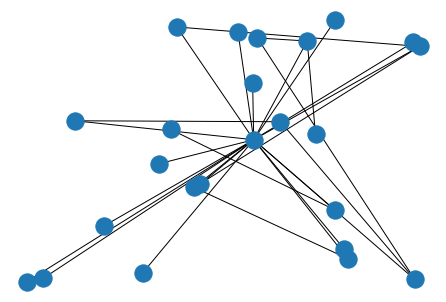

In [3]:
nx.draw_random(G[2])

In [4]:
start = timeit.default_timer()
N_of_nodes = []
N_of_edges = []
for i in range(1,12):
    print('Nodes for phase %s is %d.'%(i, G[i].number_of_nodes()), ' and Edges is %d.'%(G[i].number_of_edges()))
    N_of_nodes.append(G[i].number_of_nodes())
    N_of_edges.append(G[i].number_of_edges())
    
stop = timeit.default_timer()

print('Runtime = %.6f'%(stop - start))

Nodes for phase 1 is 15.  and Edges is 18.
Nodes for phase 2 is 24.  and Edges is 28.
Nodes for phase 3 is 33.  and Edges is 56.
Nodes for phase 4 is 33.  and Edges is 48.
Nodes for phase 5 is 32.  and Edges is 39.
Nodes for phase 6 is 27.  and Edges is 47.
Nodes for phase 7 is 36.  and Edges is 49.
Nodes for phase 8 is 42.  and Edges is 58.
Nodes for phase 9 is 34.  and Edges is 44.
Nodes for phase 10 is 42.  and Edges is 50.
Nodes for phase 11 is 41.  and Edges is 50.
Runtime = 0.000670


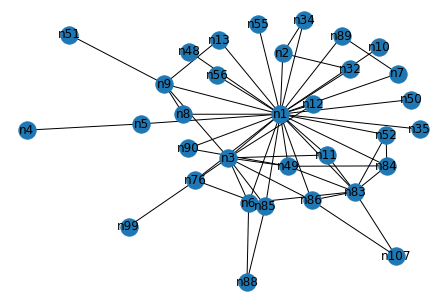

In [5]:
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True) 

In [6]:
node = 'n83'
print(nx.degree_centrality(G[3])[node], ' and ', nx.degree_centrality(G[9])[node])

0.25  and  0.030303030303030304


In [7]:
l = ['n1','n3', 'n12','n83']

In [8]:
start = timeit.default_timer()

for i in l:
    print(nx.betweenness_centrality(G[3], normalized = True)[i], ' and ', nx.betweenness_centrality(G[9], normalized = True)[i])
    
stop = timeit.default_timer()

print('Runtime = %.6f'%(stop - start))

0.829502688172043  and  0.2490530303030303
0.09549731182795697  and  0.5762310606060607
0.0  and  0.3573232323232323
0.046572580645161295  and  0.0
Runtime = 0.017614


In [9]:
start = timeit.default_timer()


for i in l:
    print(nx.eigenvector_centrality(G[3])[i], ' and ', nx.eigenvector_centrality(G[9])[i])
    
stop = timeit.default_timer()

print('Runtime = %.6f'%(stop - start))

0.5938791958045414  and  0.4589575176167988
0.291304887672891  and  0.46798771473230655
0.1359904690175954  and  0.14065936326685183
0.27749730090075797  and  0.09178102356758049
Runtime = 0.009618


In [10]:
start = timeit.default_timer()


for i in l:
    print(nx.degree_centrality(G[3])[i], ' and ', nx.degree_centrality(G[9])[i])
    
stop = timeit.default_timer()

print('Runtime = %.6f'%(stop - start))

0.84375  and  0.30303030303030304
0.28125  and  0.33333333333333337
0.0625  and  0.24242424242424243
0.25  and  0.030303030303030304
Runtime = 0.000605


In [11]:
df = pd.DataFrame({})
for i in range(1,12):
    bc = nx.betweenness_centrality(G[i])
    df = df.append(bc, ignore_index=True)
    
df.head()

,n1,n2,n3,n4,n5,n54,n6,n64,n7,n8,...,n71,n93,n95,n102,n26,n43,n66,n72,n92,n94
0,0.906593,0.000000,0.000000,0.0,0.0000,0.0,0.010989,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.942688,0.000000,0.001976,NaN,0.0000,NaN,0.000000,0.0,0.0,0.001976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.829503,0.001008,0.095497,0.0,0.0625,NaN,0.033333,NaN,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.839310,0.000000,0.090438,0.0,0.0000,NaN,0.000000,NaN,0.0,0.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.883871,0.000000,0.044086,0.0,0.0000,NaN,0.000000,NaN,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for i,j,k in zip( bc.keys(), bc.values(), bc.items()):
    print("%s , %0.6f"%(i,j), ' and %s , %0.6f'%k)

n1 , 0.526282  and n1 , 0.526282
n83 , 0.000000  and n83 , 0.000000
n3 , 0.000000  and n3 , 0.000000
n88 , 0.000000  and n88 , 0.000000
n85 , 0.005769  and n85 , 0.005769
n86 , 0.000000  and n86 , 0.000000
n76 , 0.332051  and n76 , 0.332051
n11 , 0.000000  and n11 , 0.000000
n84 , 0.000000  and n84 , 0.000000
n13 , 0.000000  and n13 , 0.000000
n12 , 0.429915  and n12 , 0.429915
n14 , 0.092308  and n14 , 0.092308
n18 , 0.000000  and n18 , 0.000000
n17 , 0.000000  and n17 , 0.000000
n82 , 0.137179  and n82 , 0.137179
n78 , 0.000000  and n78 , 0.000000
n87 , 0.070513  and n87 , 0.070513
n79 , 0.178846  and n79 , 0.178846
n61 , 0.000000  and n61 , 0.000000
n16 , 0.000000  and n16 , 0.000000
n81 , 0.000000  and n81 , 0.000000
n59 , 0.000000  and n59 , 0.000000
n37 , 0.001068  and n37 , 0.001068
n36 , 0.000000  and n36 , 0.000000
n24 , 0.000000  and n24 , 0.000000
n58 , 0.047436  and n58 , 0.047436
n96 , 0.047436  and n96 , 0.047436
n46 , 0.000000  and n46 , 0.000000
n101 , 0.000000  and n10

In [13]:
df.replace(np.nan, 0, inplace=True)
df.head()

,n1,n2,n3,n4,n5,n54,n6,n64,n7,n8,...,n71,n93,n95,n102,n26,n43,n66,n72,n92,n94
0,0.906593,0.000000,0.000000,0.0,0.0000,0.0,0.010989,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.942688,0.000000,0.001976,0.0,0.0000,0.0,0.000000,0.0,0.0,0.001976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.829503,0.001008,0.095497,0.0,0.0625,0.0,0.033333,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.839310,0.000000,0.090438,0.0,0.0000,0.0,0.000000,0.0,0.0,0.062500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.883871,0.000000,0.044086,0.0,0.0000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
inv = np.array(['n1','n3','n83', 'n86', 'n85','n6', 'n11', 'n88', 'n106', 'n89', 'n106', 'n89',
                'n84', 'n5', 'n8', 'n76', 'n77', 'n87', 'n82', 'n96', 'n12', 'n17', 'n80', 'n33', 'n16'])
inv

array(['n1', 'n3', 'n83', 'n86', 'n85', 'n6', 'n11', 'n88', 'n106', 'n89',
       'n106', 'n89', 'n84', 'n5', 'n8', 'n76', 'n77', 'n87', 'n82',
       'n96', 'n12', 'n17', 'n80', 'n33', 'n16'], dtype='<U4')

In [15]:
df.drop(columns=inv, inplace=True)
df.head()

,n2,n4,n54,n64,n7,n90,n10,n47,n55,n56,...,n71,n93,n95,n102,n26,n43,n66,n72,n92,n94
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:

df.sum(axis=0)[(df.sum(axis=0)>0.08)]

n7     0.087753
n9     0.082301
n14    0.359381
n79    0.241346
n37    0.175459
n41    0.554060
dtype: float64

In [17]:
g=0

In [18]:
g+=1
nx.draw(G[g], pos=nx.drawing.nx_agraph.graphviz_layout(G[g]), with_labels=True)
plt.savefig('images/Plot of Phase %d.png'%g)

In [25]:
g=0

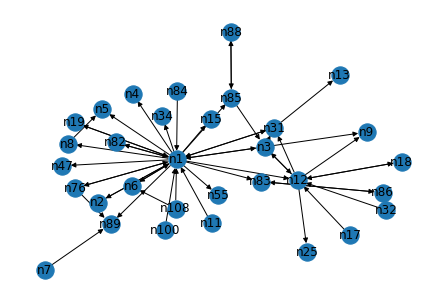

In [30]:
g+=1
nx.draw(Gdi[g], pos=nx.drawing.nx_agraph.graphviz_layout(Gdi[g]), with_labels=True)
plt.savefig('images/Directed Plot of Phase %d.png'%g)

# Written Analysis: Part (c)

In [19]:
import matplotlib.pyplot as plt

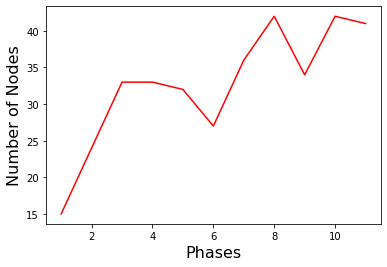

In [20]:
plt.plot(range(1,12), N_of_nodes, c='r')
plt.xlabel('Phases', size=16)
plt.ylabel('Number of Nodes', size=16)
plt.savefig('images/Nodes_vs_phases.jpg')
plt.show()

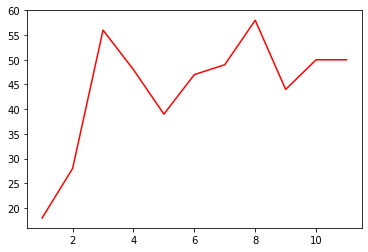

In [21]:
plt.plot(range(1,12), N_of_edges, c='r')
plt.show()

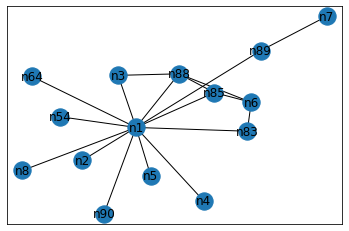

In [22]:
nx.draw_networkx(G[1])

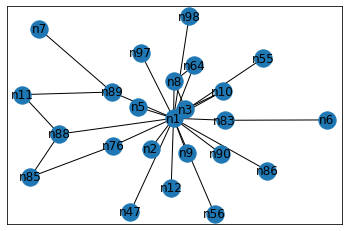

In [23]:
nx.draw_networkx(G[2])


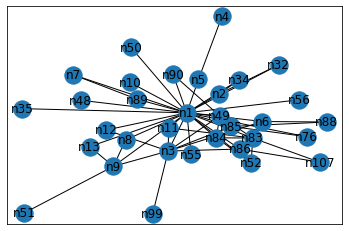

In [24]:
nx.draw_networkx(G[3])

In [36]:
df_hub = pd.DataFrame({})
df_auth = pd.DataFrame({})
for i in range(1,12):
    bc1, bc2 = nx.algorithms.link_analysis.hits(G[i], max_iter=1000000)
    df_hub = df_hub.append(bc1, ignore_index=True)
    df_auth= df_auth.append(bc2, ignore_index=True)
    
df_hub.head()

,n1,n2,n3,n4,n5,n54,n6,n64,n7,n8,...,n71,n93,n95,n102,n26,n43,n66,n72,n92,n94
0,0.097410,0.024944,0.037793,0.012472,0.024944,0.024944,0.250977,0.012472,0.003418,0.012472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.277861,0.039517,0.247245,NaN,0.039517,NaN,0.001800,0.026444,0.001351,0.048054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.171164,0.063365,0.037055,0.002439,0.054112,NaN,0.030009,NaN,0.010169,0.023988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.208632,0.013184,0.053873,0.004395,0.013184,NaN,0.065920,NaN,0.000298,0.051616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.250642,0.008454,0.018576,0.025362,0.025676,NaN,0.085777,NaN,0.000591,0.009320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_hub.replace(np.nan, 0, inplace=True)
df_auth.replace(np.nan, 0, inplace=True)
df_auth

,n1,n2,n3,n4,n5,n54,n6,n64,n7,n8,...,n71,n93,n95,n102,n26,n43,n66,n72,n92,n94
0,0.097410,0.024944,0.037793,0.012472,0.024944,0.024944,0.250977,0.012472,0.003418,0.012472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
1,0.277861,0.039517,0.247245,0.000000,0.039517,0.000000,0.001800,0.026444,0.001351,0.048054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
2,0.171164,0.063365,0.037055,0.002439,0.054112,0.000000,0.030009,0.000000,0.010169,0.023988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
3,0.208632,0.013184,0.053873,0.004395,0.013184,0.000000,0.065920,0.000000,0.000298,0.051616,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
4,0.250643,0.008454,0.018576,0.025362,0.025676,0.000000,0.085777,0.000000,0.000591,0.009320,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
5,0.259780,0.021856,0.140097,0.001973,0.123658,0.000000,0.013810,0.000000,0.000000,0.007996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
6,0.254819,0.021375,0.214135,0.003125,0.009374,0.000000,0.012499,0.000000,0.000000,0.003125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
7,0.004134,0.000605,0.007639,0.000152,0.000000,0.000000,0.000152,0.000000,0.000000,0.002063,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
8,0.087600,0.006827,0.221094,0.000000,0.000000,0.000000,0.002705,0.000000,0.006835,0.012237,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
9,0.088165,0.000000,0.005077,0.002538,0.000000,0.000000,0.000000,0.000000,0.000000,0.002557,...,0.001636,0.071532,0.115552,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000


In [38]:
df_hub.to_excel('hubs.xlsx')
df_auth.to_excel('Authorities.xlsx')

In [41]:
df_hub[['n1','n3']]

,n1,n3
0,0.097410,0.037793
1,0.277861,0.247245
2,0.171164,0.037055
3,0.208632,0.053873
4,0.250642,0.018576
5,0.259780,0.140097
6,0.254819,0.214135
7,0.004134,0.007638
8,0.087600,0.221094
9,0.088165,0.005077


In [42]:
df_auth[['n1','n3']]

,n1,n3
0,0.097410,0.037793
1,0.277861,0.247245
2,0.171164,0.037055
3,0.208632,0.053873
4,0.250643,0.018576
5,0.259780,0.140097
6,0.254819,0.214135
7,0.004134,0.007639
8,0.087600,0.221094
9,0.088165,0.005077


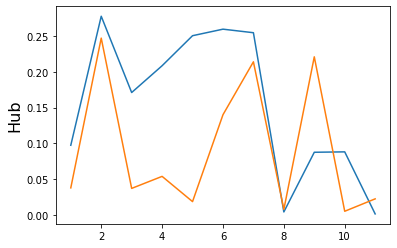

In [47]:
plt.plot(range(1,12),df_hub[['n1','n3']])
plt.ylabel('Hub', size=16)
plt.savefig('images/Hub n1 and n3.png')
plt.show()

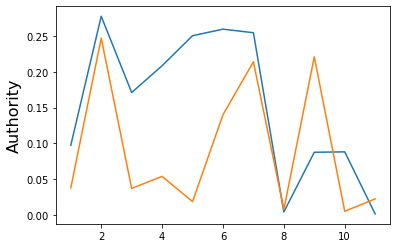

In [48]:
plt.plot(range(1,12),df_auth[['n1','n3']])
plt.ylabel('Authority', size=16)
plt.savefig('images/Authority n1 and n3.png')
plt.show()

In [46]:
nx.algorithms.link_analysis.hits(G[1], max_iter=1000000)

({'n1': 0.09741024919597457,
  'n4': 0.012471775183127415,
  'n89': 0.013346937991308962,
  'n83': 0.17313921514839117,
  'n3': 0.03779297897712488,
  'n5': 0.02494355036625483,
  'n88': 0.10035989672022845,
  'n85': 0.19883807237013126,
  'n90': 0.012471775183127415,
  'n2': 0.02494355036625483,
  'n7': 0.00341771021656168,
  'n54': 0.02494355036625483,
  'n6': 0.25097718754900494,
  'n64': 0.012471775183127415,
  'n8': 0.012471775183127415},
 {'n1': 0.09741025193034104,
  'n4': 0.012471774931496439,
  'n89': 0.013346937718640423,
  'n83': 0.17313921090132992,
  'n3': 0.03779297850314807,
  'n5': 0.024943549862992877,
  'n88': 0.10035989742976725,
  'n85': 0.1988380681816403,
  'n90': 0.012471774931496439,
  'n2': 0.024943549862992877,
  'n7': 0.0034177103248445493,
  'n54': 0.024943549862992877,
  'n6': 0.2509771956953242,
  'n64': 0.012471774931496439,
  'n8': 0.012471774931496439})